# Text Classification
## 1. SKLearn Classification
### Classification
* This is a supervised model whereby we have a number of features as well as the known labels
* Here, we are trying to identify real (ham) vs. fake (spam) text messages
* The features are the message text itself as well as the number of words and punctuation marks used
* The labels are the known values of whether a text is ham or spam
* SKLearn lets us use a number of ML models to predict whether a text is ham or spam based on its features

### Basic Features (Length and Punct)
* We will run a variety of models using just the length and punct features to predict ham/spam labels
* We can compare the results of multiple models to see how well they classify each outcome
* The models we'll use will mostly use default settings (rather than being optimized) just to give us an idea of how effective they will be
* Initial data investigation shows us that there are no null values (so no requirement to handle missing data)

In [4]:
# load libraries
import numpy as np
import pandas as pd

# read text into df
df = pd.read_csv('NLP Course Files/TextFiles/smsspamcollection.tsv', sep='\t')

# peek at data
df.head()

label                                            message  length  punct
0   ham  Go until jurong point, crazy.. Available only ...     111      9
1   ham                      Ok lar... Joking wif u oni...      29      6
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3   ham  U dun say so early hor... U c already then say...      49      6
4   ham  Nah I don't think he goes to usf, he lives aro...      61      2

In [6]:
# df info (no nulls, length, column types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [8]:
# check label vals
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
# check label counts
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Feature Distribution
Length:
* We can see from the below plot that ham and spam texts have a significantly different distribution of length
* Spam texts tend to be longer than ham texts
* Spam texts also have a much narrower range of lengths
* This makes sense as genuine texts will vary depending on nature and are also likely to contain lots of short, convenience texts (e.g. "See you later", "No worries" etc.)

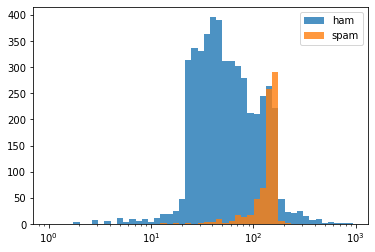

In [15]:
# load libraries
import matplotlib.pyplot as plt
%matplotlib inline

# plot distribution of ham/spam by length
plt.xscale('log') # log scale due to large value range
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label'] == 'ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == 'spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

Punctuation:
* There is less of a clear distinction between ham and spam texts when looking at punctuation
* There is a slight tendency for spam texts to have more punctuation than ham
* However this is only a minor trend, nothing as stark as seen in length above

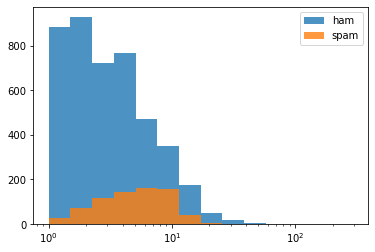

In [13]:
# plot distribution of ham/spam by punct
plt.xscale('log') # log scale due to large value range
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label'] == 'ham']['punct'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == 'spam']['punct'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

### SKLearn Models
* We will use a range of models (logistic regression, naive bayes and SVM) for an initial look at classification
* We'll split our data into test and train sets before processing

In [22]:
# load libraries
from sklearn.model_selection import train_test_split

# isolate features (X) and labels (y)
X = df[['length', 'punct']]
y = df['label']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3900, 2), (1672, 2), (3900,), (1672,))

### Model Evaluation
* All 3 of our models performed quite poorly against the ham/spam classification problem
* Accuracy was not horrific (high 80%s) but all other metrics (precision, recall, f1) were very bad
* The models were OK at correctly identifying ham texts, but failed almost entirely at identifying spam

Confusion Matrix:
* These allow you to compare the number of correct positive and negative results from your models
* Accuracy = correct / total
    * Accuracy is a useful metric if classes are imbalaced
    * But a poor one if they're not
    * e.g. if the real world occurrence of negative results is 1% then a model accuracy of 98% isn't good enough and will miss the true negatives
    * As such, you must use other metrics (precision, recall, f1 etc.)
* Precision = TP / (TP + FP)
    * Essentially tells you how many of your true predictions were relevant
* Recall = TP / (TP + FN)
    * Essentially tells you how many true predictions you made compared to all actual true values
* F1-score is a harmonic mean of precision and recall
    * A harmonic mean balances the means of the input variable's means
    * The benefit of this is that it penalises extreme errors
    * e.g. if your recall mean is 0 and your precision mean is 1, your f1-score will also be 0 rather than 0.5 (i.e. correctly indicates that your model is awful in one area at least)

In [43]:
# load libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

# create model instance
lr_model = LogisticRegression(solver='lbfgs')
nb_model = MultinomialNB()
svc_model = SVC(gamma='auto')

# store models in list
models = [[lr_model, 'Logistic Regression'],
          [nb_model, 'Naive Bayes'],
          [svc_model, 'SVM']]

# iterate through models and run fit, predict and evaluation
for model, model_name in models:
    # print model name
    print(model_name)
    
    # fit model to data
    model.fit(X_train, y_train)
    
    # make predictions on test set
    y_pred = model.predict(X_test)
    
    # confusion matrix (act vs. pred)
    print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index=['ham', 'spam'], columns=['ham', 'spam']))

    # classification report
    print(metrics.classification_report(y_test, y_pred))
    
    # model overall accuracy
    print(round(metrics.accuracy_score(y_test, y_pred),2))
    
    # newline separator
    print('\n')

Logistic Regression
       ham  spam
ham   1404    44
spam   219     5
              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672

0.84


Naive Bayes
       ham  spam
ham   1438    10
spam   224     0
              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672

0.86


SVM
       ham  spam
ham   1373    75
spam   121   103
              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46 

## 2. Text Feature Extraction
### Extracting Numerical Meaning from Raw Text (Unstructured Data)
* 

In [ ]:
# load libraries
from sklearn.feature_extraction import TfidfVectorizer

# create vectorizer instance
vect = TfidfVectorizer()

# create document term matrix
dtm = vect.fit_transform(list_of_texts)